In [ ]:
from abc import abstractmethod
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('/content/drive/MyDrive/5_AIADVANCE')

In [ ]:
class Layer:
  def __init__(self, input, output, input_shape, output_shape):
    self.input = None
    self.output = None
    self.input_shape = None
    self.output_shape = None
    raise NotImplementedError
  @abstractmethod
  def input(self):
    return self.input
  @abstractmethod
  def input_shape(self):
    return self.input_shape
  @abstractmethod
  def output(self):
    return self.output
  @abstractmethod
  def output_shape(self):
    return self.output_shape
  @abstractmethod
  def forward_propagation(self, input):
    raise NotImplementedError
  @abstractmethod
  def backward_propagation(self, output_err, learning_rate):
    raise NotImplementedError

### Tối ưu bằng GD

In [ ]:
#class FC
import numpy as np

class FCLayer(Layer):
  def __init__(self, input_shape, output_shape):
    """
    :param input_shape: (1, 3)
    :param output_shape: (1, 4)
    => weight: (3, 4)
    => bias:   (1, 4)
    """
    self.input_shape = input_shape
    self.output_shape = output_shape
    self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
    self.bias = np.random.rand(1, output_shape[1]) - 0.5

  def forward_propagation(self, input):
    self.input = input
    self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
    return self.output

  # nhận vào ma trận lỗi của lớp sau, để cập nhật trọng số của lớp hiện tại
  def backward_propagation(self, output_error, learning_rate):
    curent_layer_err = np.dot(output_error, self.weights.T)
    dweight = np.dot(self.input.T, output_error)
    self.weights -= dweight*learning_rate
    self.bias -= learning_rate*output_error
    return curent_layer_err

### Tối ưu bằng Adam

In [ ]:
#class FC
import numpy as np

class FCLayer(Layer):
  def __init__(self, input_shape, output_shape):
    """
    :param input_shape: (1, 3)
    :param output_shape: (1, 4)
    => weight: (3, 4)
    => bias:   (1, 4)
    """
    self.input_shape = input_shape
    self.output_shape = output_shape
    self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
    self.bias = np.random.rand(1, output_shape[1]) - 0.5
    # Khởi tạo các thông số cho Adam
    self.beta1 = 0.9
    self.beta2 = 0.999
    self.epsilon = 1e-8
    self.m = 0
    self.v = 0
    self.t = 0

  def forward_propagation(self, input):
    self.input = input
    self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
    return self.output

  def backward_propagation(self, output_error, learning_rate):
    # Tính gradient của trọng số
    dweight = np.dot(self.input.T, output_error)
    # Cập nhật moment
    self.m = self.beta1 * self.m + (1 - self.beta1) * dweight
    # Cập nhật moment bậc hai
    self.v = self.beta2 * self.v + (1 - self.beta2) * (dweight ** 2)
    # Điều chỉnh moment
    m_hat = self.m / (1 - self.beta1 ** (self.t + 1))
    v_hat = self.v / (1 - self.beta2 ** (self.t + 1))
    # Cập nhật trọng số
    self.weights -= learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
    # Tăng bước thời gian
    self.t += 1
    # Tính và trả về lỗi của lớp trước đó
    current_layer_err = np.dot(output_error, self.weights.T)
    return current_layer_err
  # # nhận vào ma trận lỗi của lớp sau, để cập nhật trọng số của lớp hiện tại
  # def backward_propagation(self, output_error, learning_rate):
  #   curent_layer_err = np.dot(output_error, self.weights.T)
  #   dweight = np.dot(self.input.T, output_error)
  #   self.weights -= dweight*learning_rate
  #   self.bias -= learning_rate*output_error
  #   return curent_layer_err

### Tối ưu bằng GD with momentum

In [ ]:
class FCLayer(Layer):
    def __init__(self, input_shape, output_shape, momentum=0.9):  # Thêm thông số momentum
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
        self.bias = np.random.rand(1, output_shape[1]) - 0.5
        self.momentum = momentum  # Lưu trữ giá trị momentum
        self.momentum_weights = np.zeros_like(self.weights)

    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        # Tính gradient của trọng số
        dweight = np.dot(self.input.T, output_error)
        # Cập nhật trọng số với momentum
        self.momentum_weights = self.momentum_weights * self.momentum - learning_rate * dweight
        self.weights += self.momentum_weights
        self.bias -= learning_rate * output_error
        # Tính và trả về lỗi của lớp trước đó
        current_layer_err = np.dot(output_error, self.weights.T)
        return current_layer_err

Class Activation Layer

In [ ]:
class ActivationLayer(Layer):
  def __init__(self, input_shape, output_shape, activation, activation_prime):
    """
    :param input_shape: đầu vào input mảng (1, 4)
    :param output_shape: mảng
    :param activation: hàm
    :param activation_prime: hàm
    """
    self.input_shape = input_shape
    self.output_shape = output_shape
    self.activation = activation
    self.activation_prime = activation_prime

  def forward_propagation(self, input):
    self.input = input
    self.output = self.activation(self.input)
    return self.output

  def backward_propagation(self, output_err, learning_rate):
    return self.activation_prime(self.input)*output_err   # đạo hàm của sigmoid nhân cho ma trận lỗi nhận từ lớp trước


In [ ]:
class Network:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.loss_prime = None

  def add(self, layer):
    self.layers.append(layer)

  def setup_loss(self, loss, loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

  def predict(self, input):
    result = []
    n = len(input)
    for i in range(n):
      output = input[i]
      for layer in self.layers:
        output = layer.forward_propagation(output)
      result.append(output)
    return result

  def accuracy(self, x_test, y_test):
    """
    Tính độ chính xác trên tập test.
    :param x_test: Dữ liệu đầu vào của tập test
    :param y_test: Nhãn của tập test
    :return: Độ chính xác trên tập test
    """
    predictions = self.predict(x_test)
    correct = 0
    total = len(y_test)
    for prediction, true_value in zip(predictions, y_test):
        if np.round(prediction) == true_value:
            correct += 1
    accuracy = correct / total
    return accuracy

  def fit(self, x_train, y_train, learning_rate, epochs, batch_size=1):
    n = len(x_train)
    losses = []
    for i in range(epochs):
      err = 0
      indices = np.arange(n)
      np.random.shuffle(indices)
      for j in range(0, n, batch_size):
        batch_indices = indices[j:min(j+batch_size, n)]
        batch_x = x_train[batch_indices]
        batch_y = y_train[batch_indices]
        batch_err = 0
        for k in range(len(batch_x)):
          output = batch_x[k]
          for layer in self.layers:
            output = layer.forward_propagation(output)
          batch_err += self.loss(batch_y[k], output)
          error = self.loss_prime(batch_y[k], output)
          for layer in reversed(self.layers):
            error = layer.backward_propagation(error, learning_rate)
        err += batch_err / len(batch_x)
      err /= (n // batch_size)
      losses.append(err)
      print('epoch : %d/%d err = %f' % (i+1, epochs, err))
    # Plot the loss
    losses = np.squeeze(losses)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss (Batch Gradient Descent + Log Loss + Sigmoid)')
    plt.show()

  # def fit(self, x_train, y_train, learning_rate, epochs):
  #   n = len(x_train)
  #   for i in range(epochs):
  #     err = 0
  #     for j in range(n):
  #       #lan truyen tiến
  #       output = x_train[j]
  #       for layer in self.layers:
  #         output = layer.forward_propagation(output)
  #       #tính lỗi của từng
  #       err += self.loss(y_train[j], output)
  #       #lan truyền ngược
  #       error = self.loss_prime(y_train[j], output)
  #       for layer in reversed(self.layers):
  #         error = layer.backward_propagation(error, learning_rate)
  #     err = err / n
  #     print('epoch : %d/%d err = %f'%(i, epochs, err))


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def log_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def log_loss_prime(y_true, y_pred):
    return - (y_true / y_pred - (1 - y_true) / (1 - y_pred))

In [ ]:
import numpy as np

def relu(z):
  return np.maximum(0, z)

def relu_prime(z):
  z[z<0] = 0
  z[z>=0] = 1
  return z

def mse(y_true, y_predict):
  return 0.5*(y_predict-y_true)**2

def mse_prime(y_true, y_predict):
  return y_predict - y_true


<ipython-input-71-337374b78c6f>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('epoch : %d/%d err = %f' % (i+1, epochs, err))


epoch : 1/1000 err = 0.712020
epoch : 2/1000 err = 0.659836
epoch : 3/1000 err = 0.652022
epoch : 4/1000 err = 0.633518
epoch : 5/1000 err = 0.628758
epoch : 6/1000 err = 0.613776
epoch : 7/1000 err = 0.620543
epoch : 8/1000 err = 0.642414
epoch : 9/1000 err = 0.597287
epoch : 10/1000 err = 0.575425
epoch : 11/1000 err = 0.600372
epoch : 12/1000 err = 0.593702
epoch : 13/1000 err = 0.564352
epoch : 14/1000 err = 0.575998
epoch : 15/1000 err = 0.560559
epoch : 16/1000 err = 0.557766
epoch : 17/1000 err = 0.569503
epoch : 18/1000 err = 0.561124
epoch : 19/1000 err = 0.554952
epoch : 20/1000 err = 0.572251
epoch : 21/1000 err = 0.565316
epoch : 22/1000 err = 0.563266
epoch : 23/1000 err = 0.570072
epoch : 24/1000 err = 0.574013
epoch : 25/1000 err = 0.582117
epoch : 26/1000 err = 0.588922
epoch : 27/1000 err = 0.578702
epoch : 28/1000 err = 0.555509
epoch : 29/1000 err = 0.559048
epoch : 30/1000 err = 0.576233
epoch : 31/1000 err = 0.559972
epoch : 32/1000 err = 0.575755
epoch : 33/1000 e

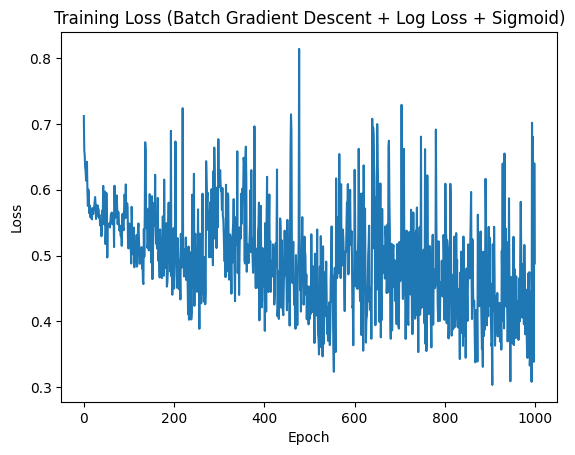

Độ chính xác trên tập test:
0.8
Kết quả dự đoán theo đặc trưng [4, 9]:
1


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('data_logistic.csv')
data = df.to_numpy()
X = data[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng là output
y = data[:, -1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# x_train = X_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
# y_train = X_test = np.array([[[0]], [[1]], [[1]], [[0]]])

x_train = np.reshape(X_train, (X_train.shape[0], 1, 2))
y_train = np.reshape(y_train, (y_train.shape[0], 1, 1))

net = Network()
net.add(FCLayer((1, 2), (1, 3)))
net.add(ActivationLayer((1, 3), (1, 3), sigmoid, sigmoid_prime))
net.add(FCLayer((1, 3), (1, 1)))
net.add(ActivationLayer((1, 1), (1, 1), sigmoid, sigmoid_prime))
net.setup_loss(log_loss, log_loss_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.01)

print("Độ chính xác trên tập test:")
accuracy = net.accuracy(X_test, y_test)
print(accuracy)

print("Kết quả dự đoán theo đặc trưng [4, 9]:")
out = net.predict([[4, 9]])
print(1) if out[0][0][0] >= 0.5 else print(0)

## Nháp

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def sigmoid_prime(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

In [ ]:
# def log_prime(X_train, y_predict, y_train): #sửa lại
#     return np.dot(X_train.T, y_predict-y_train)

In [ ]:
def log_prime(y_predict, y_train): #sửa lại
    return (y_predict-y_train)/(y_predict*(1-y_predict))

In [ ]:
def log(y_train, y_predict):
    print("y_train", y_train)
    print("y_predict", y_predict)
    epsilon = 1e-3  # Giá trị rất nhỏ để thay thế cho giá trị 0
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon)  # Giới hạn y_predict trong khoảng (epsilon, 1 - epsilon)

    # Xử lý y_train để đảm bảo nằm trong phạm vi từ 0 đến 1
    y_train = np.clip(y_train, 0, 1)

    # Tính toán loss function
    loss = -np.mean(np.multiply(y_train, np.log(y_predict)) + np.multiply(1 - y_train, np.log(1 - y_predict)))

    return loss

In [ ]:
file_path = r"/content/drive/MyDrive/5_AIADVANCE/data_logistic.csv"

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(file_path).values
N, d = data.shape
X = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
X = np.reshape(X, (99, 1, 2))
y = np.reshape(y, (99, 1, 1))

In [ ]:
X_train = X[:70]
X_test = X[:70]
y_train = y[70:]
y_test = y[70:]

In [ ]:
# x_train = np.array([[[0, 1]], [[1, 0]], [[1, 1]], [[0, 0]]])
# y_train = np.array([[[1]], [[1]], [[0]], [[0]]])
# print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
# x_train = np.array([[[0, 1]], [[1, 0]], [[1, 1]], [[0, 0]]])
# y_train = np.array([[[1]], [[1]], [[0]], [[0]]])
net = Network()
net.add(FCLayer((1, 2), (1, 3)))
net.add(ActivationLayer((1, 3), (1, 3), relu, relu_prime))
net.add(FCLayer((1, 3), (1, 1)))
net.add(ActivationLayer((1, 1), (1, 1), relu, relu_prime))
net.setup_loss(log, log_prime)
net.fit(x_train, y_train, epochs=100, learning_rate=0.00004)

Streaming output truncated to the last 5000 lines.
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[1.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[0.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[0.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[0.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[1.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[1.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[0.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y_train [[1.]]
y_predict [[nan]]
[[nan]]
[[nan nan nan]]
[[nan nan nan]]
[[nan nan]]
epoch 14/100: err = nan
y

KeyboardInterrupt: 

In [ ]:
out = net.predict(x_train)
print(y_train[15])
print(out)

[[1.]]
[array([[0.76070991]])]
